In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
data = pd.read_csv("/content/drive/MyDrive/GlaucomaDATA.csv")

NameError: ignored

In [2]:
data.info()

NameError: ignored

In [ ]:
data


,ag,at,as,an,ai,eag,eat,eas,ean,eai,...,tmt,tms,tmn,tmi,mr,rnf,mdic,emd,mv,Class
0,2.220,0.354,0.580,0.686,0.601,1.267,0.336,0.346,0.255,0.331,...,-0.018,-0.230,-0.510,-0.158,0.841,0.410,0.137,0.239,0.035,normal
1,2.681,0.475,0.672,0.868,0.667,2.053,0.440,0.520,0.639,0.454,...,-0.014,-0.165,-0.317,-0.192,0.924,0.256,0.252,0.329,0.022,normal
2,1.979,0.343,0.508,0.624,0.504,1.200,0.299,0.396,0.259,0.246,...,-0.097,-0.235,-0.337,-0.020,0.795,0.378,0.152,0.250,0.029,normal
3,1.747,0.269,0.476,0.525,0.476,0.612,0.147,0.017,0.044,0.405,...,-0.035,-0.449,-0.217,-0.091,0.746,0.200,0.027,0.078,0.023,normal
4,2.990,0.599,0.686,1.039,0.667,2.513,0.543,0.607,0.871,0.492,...,-0.105,0.084,-0.012,-0.054,0.977,0.193,0.297,0.354,0.034,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,2.801,0.481,0.729,0.888,0.704,1.841,0.312,0.550,0.583,0.396,...,-0.180,-0.224,-0.085,-0.006,0.945,0.121,0.182,0.276,0.033,glaucoma
192,1.698,0.265,0.449,0.530,0.454,1.128,0.211,0.281,0.286,0.351,...,-0.137,-0.209,-0.289,0.043,0.736,0.273,0.207,0.312,0.036,glaucoma
193,2.124,0.402,0.514,0.697,0.511,1.595,0.369,0.430,0.323,0.473,...,-0.071,-0.048,-0.278,0.048,0.823,0.088,0.174,0.231,0.028,glaucoma
194,2.039,0.374,0.491,0.675,0.500,1.561,0.362,0.397,0.316,0.485,...,0.187,0.026,-0.126,0.167,0.808,0.010,0.272,0.355,0.023,glaucoma


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [ ]:
data.isnull().sum()

ag       0
at       0
as       0
an       0
ai       0
        ..
rnf      0
mdic     0
emd      0
mv       0
Class    0
Length: 63, dtype: int64

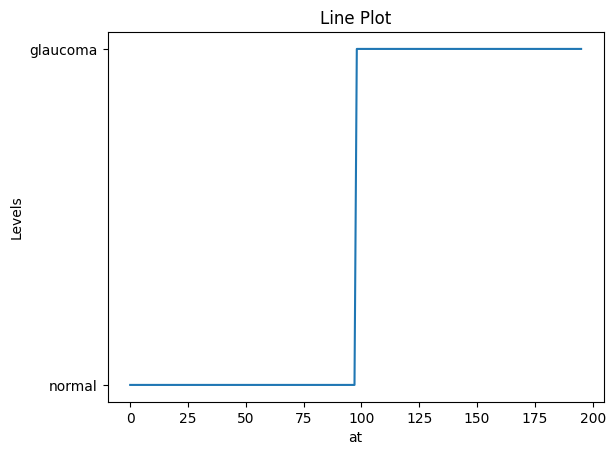

In [ ]:
plt.plot(data['Class'])
plt.xlabel("at")
plt.ylabel("Levels")
plt.title("Line Plot")
plt.show()


In [ ]:
#the data contains String values In class Column
#storing the data in a new variable to change the string values
newdata = data
#the line replaces string vlaues normal and glaucoma with 0 and 1 as type integer
newdata['Class'] = newdata['Class'].replace(r'normal','0').replace(r'glaucoma','1').astype(int)
newdata

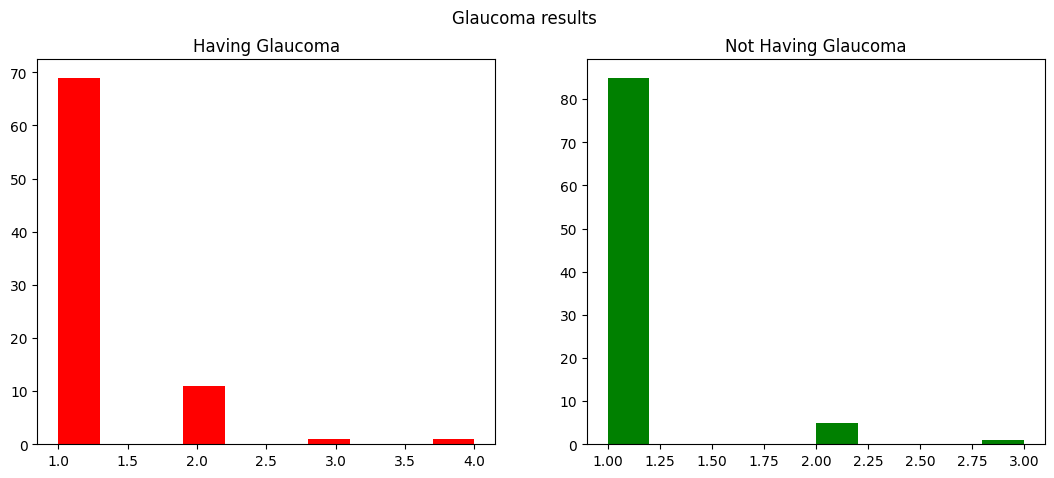

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
data_len=data[newdata['Class']==1]['eat'].value_counts()
ax1.hist(data_len,color='red')
ax1.set_title('Having Glaucoma')
data_len=data[newdata['Class']==0]['eat'].value_counts()
ax2.hist(data_len,color='green')
ax2.set_title('Not Having Glaucoma')
fig.suptitle('Glaucoma results')
plt.show()

In [ ]:
from sklearn import preprocessing
d = preprocessing.normalize(newdata.iloc[:,1:5], axis=0)
scaled_df = pd.DataFrame(d, columns=["Class", "at", "eat", "mv"])
scaled_df.head()

,Class,at,eat,mv
0,0.053105,0.061772,0.056660,0.063198
1,0.071257,0.071570,0.071693,0.070139
2,0.051455,0.054104,0.051539,0.052998
3,0.040354,0.050695,0.043363,0.050054
4,0.089859,0.073061,0.085817,0.070139


In [ ]:
feature = ['at','eat']
train,test=train_test_split(newdata,test_size=0.3,random_state=0,stratify=data['Class'])
X=data[feature]
Y=data['Class']
train_X=train[train.columns[:-1]]
train_Y=train[train.columns[-1:]]
test_X=test[test.columns[:-1]]
test_Y=test[test.columns[-1:]]


In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))
report = classification_report(test_Y, prediction3)
print("Classification Report:\n", report)

The accuracy of the Logistic Regression is 0.847457627118644
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.83      0.86      0.85        29

    accuracy                           0.85        59
   macro avg       0.85      0.85      0.85        59
weighted avg       0.85      0.85      0.85        59



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


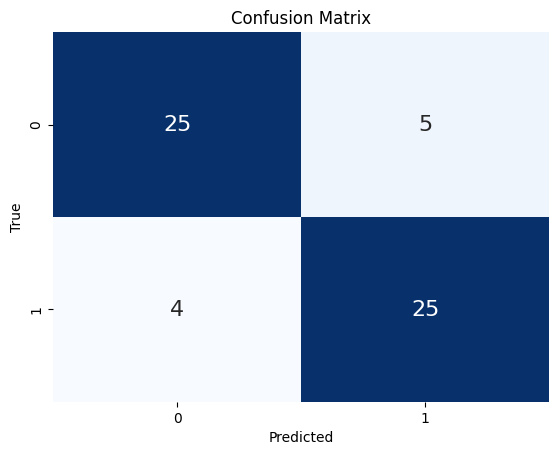

In [ ]:
#confusion Matrix
cm = confusion_matrix(test_Y, prediction3)
cm
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
accuracy = accuracy_score(test_Y, prediction.round())
print('The accuracy of Linear Regression is:', accuracy)

The accuracy of Linear Regression is: 0.7288135593220338
